In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn


sys.path.append("../../functions")

from Utils import *
import scipy

%matplotlib inline

In [14]:
raw_data = pd.read_csv("../../data/twoArmedandit_with_confidence.csv")
# selecting usefull columns
data = raw_data[
    [
        "sub",
        "condition",
        "cresp",
        "resp",
        "cor",
        "cj",
        "phase",
        "trial",
        "trial_rev",
        "reward",
        "Lreward",
        "Hreward",
    ]
]
# excluding chance level subjects
chance_level_subjects = [45634, 46069, 46279, 46303, 46651, 47398]

# selecting portion of data with proper task
lv_induction_data = data[
    (data["phase"] == "induction")
    & (data["condition"] == "hc")
    & (~data["sub"].isin(chance_level_subjects))
]
subjects = lv_induction_data["sub"].unique()

hv_induction_data =  data[
    (data["phase"] == "induction")
    & (data["condition"] == "lc1")
    & (~data["sub"].isin(chance_level_subjects))
]


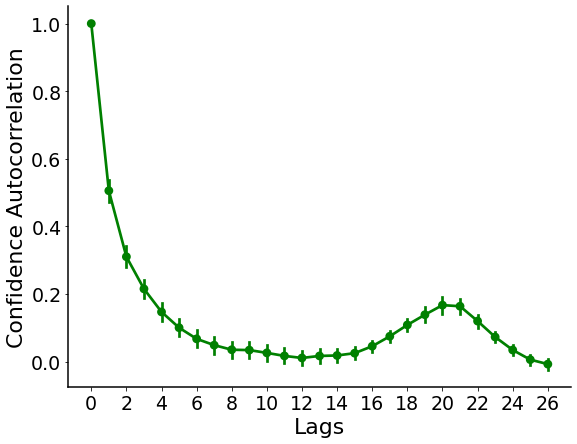

In [17]:
import statsmodels.api as sm
autocorrelations_lv = []
autocorrelations_hv = []
lags = []
subject_cl = []
for sub in subjects:
    subject_data = lv_induction_data[lv_induction_data["sub"] == sub]
    acf = sm.tsa.acf(subject_data["cj"])
    autocorrelations_lv.extend(acf)
    
    subject_data = hv_induction_data[hv_induction_data["sub"] == sub]
    acf = sm.tsa.acf(subject_data["cj"])
    autocorrelations_hv.extend(acf)
    
    lags.extend(np.arange(len(acf)))
    subject_cl.extend([sub]*len(acf))
    
lv_ac_df = pd.DataFrame(zip(subject_cl,lags, autocorrelations_lv), columns=["subject","lags", "acf"])
hv_ac_df = pd.DataFrame(zip(subject_cl,lags, autocorrelations_hv), columns=["subject","lags", "acf"])




plt.figure(figsize=(9, 7))

seaborn.pointplot(data = lv_ac_df, x = "lags", y= "acf", color="green", errorbar="se")

ax = plt.gca()
# hide x-axis
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(1.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


plt.xticks(fontsize=19)


plt.yticks(fontsize=19)


plt.xlabel("Lags", fontsize=22)
plt.ylabel("Confidence Autocorrelation", fontsize=22)

plt.locator_params(axis='x', nbins=15)


plt.show()

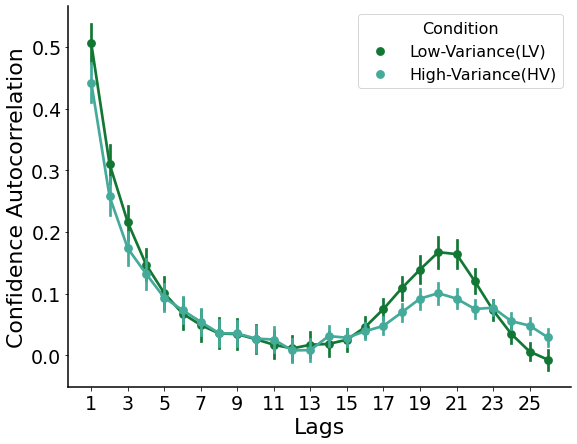

In [30]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combine your two DataFrames and add a 'condition' column
lv_ac_df['condition'] = 'Low-Variance(LV)'
hv_ac_df['condition'] = 'High-Variance(HV)'
combined_df = pd.concat([lv_ac_df, hv_ac_df], ignore_index=True)
combined_df = combined_df[combined_df["lags"]> 0]
# 2. Plot using seaborn
plt.figure(figsize=(9, 7))
sns.pointplot(
    data=combined_df,
    x='lags',
    y='acf',
    hue='condition',
    errorbar="se",
    palette=["#117733", "#44AA99"])

# 3. Tidy up the axes and look
ax = plt.gca()
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(1.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.xlabel("Lags", fontsize=22)
plt.ylabel("Confidence Autocorrelation", fontsize=22)
plt.locator_params(axis='x', nbins=15)

plt.legend(title='Condition', fontsize=16, title_fontsize=16)
plt.show()


In [32]:
backward_simulation_df_high = pd.read_csv("backward_simulation_df_high.csv")
backward_simulation_df_low = pd.read_csv("../../results/backward_simulation_df.csv")

In [41]:
backward_avg_low = backward_simulation_df_low.groupby("subject").mean().reset_index()
lv_avg = lv_induction_data.groupby("sub").mean().reset_index().rename(columns={"sub": "subject", "cj":"emp_avg_conf"})

backward_avg_high = backward_simulation_df_high.groupby("subject").mean().reset_index()
hv_avg = hv_induction_data.groupby("sub").mean().reset_index().rename(columns={"sub": "subject", "cj":"emp_avg_conf"})


In [46]:
low_df = backward_avg_low.merge(lv_avg, on="subject")[["subject", "emp_avg_conf", "cor_x"]]
high_df = backward_avg_high.merge(hv_avg, on="subject")[["subject", "emp_avg_conf", "cor_x"]]


In [48]:
low_df

,subject,emp_avg_conf,cor_x
0,45628,4.676476,0.788875
1,45640,4.494590,0.502150
2,45664,3.148277,0.500425
3,45682,3.741547,0.652875
4,45745,4.684585,0.737750
5,45760,4.276919,0.759400
6,45763,4.526510,0.779975
7,45805,4.865320,0.684925
8,45829,3.932559,0.776250
9,45964,3.879826,0.767750


In [47]:
from Plotting import *

(p = 3.86e-02, r = 0.28, ci = [0.02,0.51])


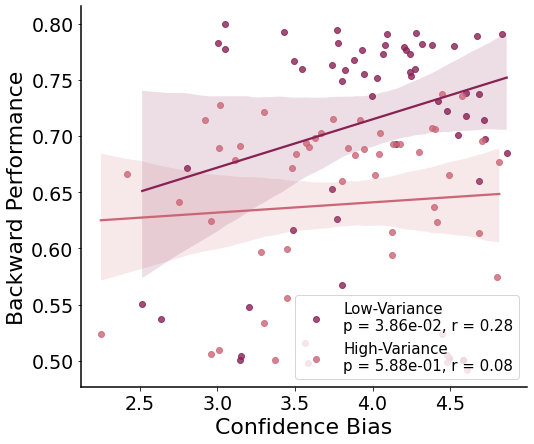

In [55]:
plt.figure(figsize=(8, 7))


res = scipy.stats.pearsonr(low_df["emp_avg_conf"], low_df["cor_x"])

stat, pval= res 
r_low, r_high = res.confidence_interval(.95)
print("(p = {:.2e}, r = {:.2f}, ci = [{:.2f},{:.2f}])".format(pval, stat,r_low,r_high))

res2 = scipy.stats.pearsonr(high_df["emp_avg_conf"], high_df["cor_x"])

stat2, pval2= res2 
r_low, r_high = res.confidence_interval(.95)


seaborn.regplot(data=low_df, x="emp_avg_conf", y="cor_x", color="#882255", label = "Low-Variance\np = {:.2e}, r = {:.2f}".format(pval, stat))

seaborn.regplot(data=high_df, x="emp_avg_conf", y="cor_x", color="#CC6677", label = "High-Variance\np = {:.2e}, r = {:.2f}".format(pval2, stat2))


plt.ylabel("Backward Performance", fontsize=22)
plt.xlabel("Confidence Bias", fontsize=22)

ax = plt.gca()
# hide x-axis
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(1.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=19)
plt.yticks(fontsize=19)

plt.legend(fontsize=15, loc = "lower right")

